In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from tqdm import tqdm

In [3]:
sns.set()

In [4]:
df=yf.download('TSLA.NS', start='2019-1-1', end='2025-2-1', auto_adjust= True)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TSLA.NS']: YFTzMissingError('possibly delisted; no timezone found')


In [5]:
#df.head()

In [6]:
#number_simulation = 100
#predict_day = 30

In [7]:
# Parameters
S0 = 337        # Initial stock price
mu = 0.12       # Expected annual return (12%)
sigma = 0.2     # Annual volatility (20%)
T = 1           # Time horizon in years
N = 250         # Number of time steps (trading days in a year)
M = 10000       # Number of simula tions

In [8]:
final_prices = np.zeros(M)

In [9]:
dt = T / N      # Time step size
simulations = np.zeros((M, N))  # Store all simulated paths

# Run Monte Carlo Simulation
for i in range(M):
    price_path = [S0]
    for _ in range(N-1):
        epsilon = np.random.normal(0, 1)  # Random normal variable
        S_t = price_path[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * epsilon * np.sqrt(dt))
        price_path.append(S_t)
    simulations[i, :] = price_path

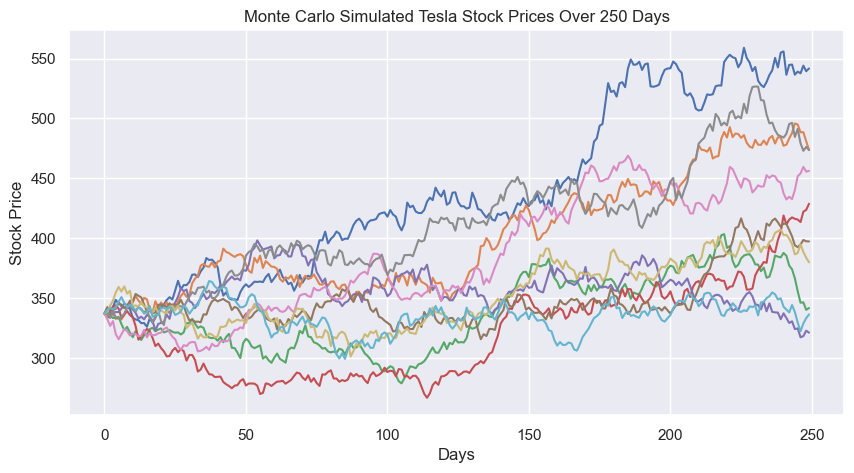

In [10]:
# Plot a few simulated paths
plt.figure(figsize=(10,5))
for i in range(10):  # Plot 10 sample paths
    plt.plot(simulations[i])
plt.title("Monte Carlo Simulated Tesla Stock Prices Over 250 Days")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

In [11]:
# Calculate Expected Future Price and Confidence Interval
mean_final_price = np.mean(simulations[:, -1])
std_final_price = np.std(simulations[:, -1])
conf_interval = (mean_final_price - 1.96 * std_final_price, mean_final_price + 1.96 * std_final_price)

print(f"Expected Stock Price after {T} year: ${mean_final_price:.2f}")
print(f"95% Confidence Interval: {conf_interval}")

Expected Stock Price after 1 year: $380.22
95% Confidence Interval: (229.42610621675345, 531.0098082223926)
